## 당신이 NO SHOW 할 확률은?

## 탐구 주제

## 1) 신체적 특성(나이, 질병, 장애)들이 No_show 여부에 영향을 미치는가?
나이가 많거나 질병을 가지고 있거나 장애를 가진 사람들은 자신의 몸을 걱정해서 No_show 할 확률이 적을 것이다.

## 2) 사회적 지위(Scholarship)가 No_show 여부에 영향을 미치는가?
Scolarship = 1 즉, 가난한 사람일수록 의료적 지원이 크기 때문에 No_show 할 확률이 적을 것이다.

## 3) 예약 확인 문자(SMS_received) 수신 여부가 No_show 여부에 영향을 미치는가?
예약 확인 문자를 통해 진료가 있음을  rewind 해줌으로 No_show 할 확률이 적을 것이다.

## 4) 대기 기간(Wait_day)이 No_show 여부에 영향을 미치는가?
대기시간이 길면 진료예약을 잊을 확률이 높아짐으로 No_show 할 확률이 높아질 것이다.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision %.3f
%matplotlib inline

#데이터 읽기
data = pd.read_csv("NO_show.csv")

The data set provides us with 14 columns:

1-Patient_Id: Identification of a patient.

2-Appointment_ID: Identification of each appointment

3-Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

4-Scheduled_Date: The day someone called or registered the appointment, this is before appointment of course.

5-Appiontment_Date: The day of the actuall appointment, when they have to visit the doctor.

6-Age: How old is the patient.

7-Neighbourhood: Where the appointment takes place.

8-Scholarship: True of False and it's kinda of health care program.

9-Hyper_tension:True or False.

10 Diabetes: True or False.

11-Alcoholism: True or False.

12-Handicap: True or False. Disabilities

13-SMS_received:1 or more messages sent to the patient.

14-No-show: True or False. it's True when the patient didn't attend.

In [2]:
# 잘못된 열 rename.
data.rename(columns={"Hipertension": "Hypertension",
                     "ScheduledDay": "Scheduled_day","AppointmentDay":"Appointment_day", 
                     "Handcap":"Handicap"}, inplace=True)

In [3]:
# 결측값 확인.
data.isnull().sum()

PatientId          0
AppointmentID      0
Gender             0
Scheduled_day      0
Appointment_day    0
Age                0
Neighbourhood      0
Scholarship        0
Hypertension       0
Diabetes           0
Alcoholism         0
Handicap           0
SMS_received       0
No-show            0
dtype: int64

In [4]:
# 중복값 확인.
data.duplicated().sum()

0

In [5]:
# No_Show를 했으면 1, 아니면 0으로 설정.
data['No_Show'] = [1 if b == 'Yes' else 0 for b in data['No-show']]
data.head()

,PatientId,AppointmentID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


## 1) 신체적 특성(나이, 질병, 장애)들이 No_show 여부에 영향을 미치는가?
나이가 많거나 질병을 가지고 있거나 장애를 가진 사람들은 자신의 몸을 걱정해서 No_show 할 확률이 적을 것이다.

1. 나이

In [6]:
mod_age = smf.glm(formula = "No_Show~ Age", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_age.aic,'Parameter:', mod_age.params, sep='\n')

AIC:
110805.24020869004
Parameter:
Intercept   -1.137712
Age         -0.006562
dtype: float64


2. 질병

In [7]:
mod_Hyper = smf.glm(formula = "No_Show~ Hypertension", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_Hyper.aic,'Parameter:', mod_Hyper.params, sep='\n')

AIC:
111064.59827011601
Parameter:
Intercept      -1.330741
Hypertension   -0.233635
dtype: float64


In [8]:
mod_Diab = smf.glm(formula = "No_Show~ Diabetes", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_Diab.aic,'Parameter:', mod_Diab.params, sep='\n')

AIC:
111183.46502862276
Parameter:
Intercept   -1.363770
Diabetes    -0.152356
dtype: float64


In [9]:
mod_Alcoh = smf.glm(formula = "No_Show~ Alcoholism", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_Alcoh.aic,'Parameter:', mod_Alcoh.params, sep='\n')

AIC:
111209.60426682547
Parameter:
Intercept    -1.374173
Alcoholism   -0.002847
dtype: float64


3. 장애

In [10]:
mod_Handi = smf.glm(formula = "No_Show~ Handicap", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_Handi.aic,'Parameter:', mod_Handi.params, sep='\n')

AIC:
111205.42044296555
Parameter:
Intercept   -1.372165
Handicap    -0.097465
dtype: float64


## 2) 사회적 지위(Scholarship)가 No_show 여부에 영향을 미치는가?
Scolarship = 1 즉, 가난한 사람일수록 의료적 지원이 크기 때문에 No_show 할 확률이 적을 것이다.

In [11]:
mod_Schol = smf.glm(formula = "No_Show~ Scholarship", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_Schol.aic,'Parameter:', mod_Schol.params, sep='\n')

AIC:
111119.11980587793
Parameter:
Intercept     -1.398391
Scholarship    0.231200
dtype: float64


## 3) 예약 확인 문자(SMS_received) 수신 여부가 No_show 여부에 영향을 미치는가?
예약 확인 문자를 통해 진료가 있음을  rewind 해줌으로 No_show 할 확률이 적을 것이다.

In [12]:
mod_SMS = smf.glm(formula = "No_Show~ SMS_received", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_SMS.aic,'Parameter:', mod_SMS.params, sep='\n')

AIC:
109507.16997636681
Parameter:
Intercept      -1.606802
SMS_received    0.641137
dtype: float64


## 4) 대기 기간(Wait_day)이 No_show 여부에 영향을 미치는가?
대기시간이 길면 진료예약을 잊을 확률이 높아짐으로 No_show 할 확률이 높아질 것이다.

In [13]:
# 대기시간 구하기.
from datetime import date

d0 = pd.DatetimeIndex(data['Scheduled_day']).date 
d1 = pd.DatetimeIndex(data['Appointment_day']).date
delta = d1 - d0 
data['between'] = delta
data['Wait_day']=0
for i in range (110527):
    x = np.timedelta64(data['between'][i], 'ns')
    days = x.astype('timedelta64[D]')
    data['Wait_day'][i] = abs(days / np.timedelta64(1, 'D'))

<ipython-input-13-2af316292f29>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Wait_day'][i] = abs(days / np.timedelta64(1, 'D'))


In [14]:
data.head()

,PatientId,AppointmentID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No_Show,between,Wait_day
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0 days,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0 days,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0 days,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0 days,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0 days,0


In [15]:
mod_Wait = smf.glm(formula = "No_Show~ Wait_day", data = data, family=sm.families.Binomial()).fit()
print('AIC:',mod_Wait.aic,'Parameter:', mod_Wait.params, sep='\n')

AIC:
107865.43117588689
Parameter:
Intercept   -1.677594
Wait_day     0.025859
dtype: float64


KeyboardInterrupt: 

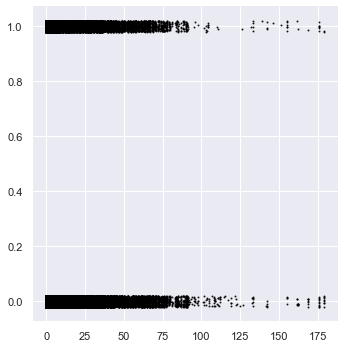

In [16]:
sns.lmplot(x = "Wait_day", y = "No_Show",data = data, logistic = True, 
           scatter_kws = {"color": "black",'s':1},line_kws = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)

In [17]:
condition_list = [(data['Wait_day'] < 10) & (data['Wait_day'] >= 0),(data['Wait_day'] < 20) & (data['Wait_day'] >= 10),(data['Wait_day'] < 30) & (data['Wait_day'] >= 20),(data['Wait_day']< 40) & (data['Wait_day']>= 30),
                  (data['Wait_day']< 50) & (data['Wait_day'] >= 40),(data['Wait_day'] < 60) & (data['Wait_day'] >= 50),(data['Wait_day'] < 70) & (data['Wait_day'] >= 60),(data['Wait_day'] < 80) & (data['Wait_day'] >= 70),
                  (data['Wait_day'] < 90) & (data['Wait_day'] >= 80),(data['Wait_day'] < 100) & (data['Wait_day'] >= 90),(data['Wait_day'] < 110) & (data['Wait_day'] >= 100),(data['Wait_day'] < 120) & (data['Wait_day'] >= 110),
                  (data['Wait_day'] < 130) & (data['Wait_day'] >= 120),(data['Wait_day'] < 140) & (data['Wait_day']>= 130),(data['Wait_day'] < 150) & (data['Wait_day'] >= 140),(data['Wait_day'] < 160) & (data['Wait_day'] >= 150),
                  (data['Wait_day'] < 170) & (data['Wait_day'] >= 160),(data['Wait_day'] < 180) & (data['Wait_day'] >= 170)]
choice_list = [ 'g11', 'g12', 'g13','g14', 'g15', 'g16','g17', 'g18','g19', 'g21', 'g22','g23', 'g24', 'g25','g26', 'g27','g28','g29']
data['groupB'] = np.select(condition_list, choice_list, default = 'NaN')
data.head()

,PatientId,AppointmentID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No_Show,between,Wait_day,groupB
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0 days,0,g11
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0 days,0,g11
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0 days,0,g11
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0 days,0,g11
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0 days,0,g11


In [18]:
group1 = data.groupby("groupB")
a = group1['No_Show'].sum()
a

groupB
g11    10679
g12     4432
g13     3596
g14     1877
g15      737
g16      371
g17      336
g18      170
g19       51
g21       29
g22       10
g23        2
g24        1
g25        6
g26        4
g27        7
g28        3
g29        8
Name: No_Show, dtype: int64

In [19]:
pd.crosstab(data.groupB, data.No_Show)

No_Show,0,1
groupB,,
g11,64011,10679
g12,9482,4432
g13,7245,3596
g14,3771,1877
g15,1387,737
g16,771,371
g17,837,336
g18,367,170
g19,132,51


In [20]:
b = group1['No_Show'].mean()
b

groupB
g11    0.142978
g12    0.318528
g13    0.331704
g14    0.332330
g15    0.346987
g16    0.324869
g17    0.286445
g18    0.316574
g19    0.278689
g21    0.211679
g22    0.294118
g23    0.105263
g24    0.142857
g25    0.461538
g26    0.444444
g27    0.636364
g28    0.157895
g29    0.307692
Name: No_Show, dtype: float64

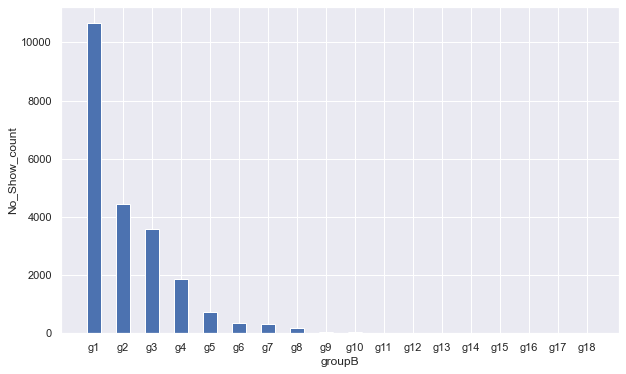

In [21]:
# 대상 데이터
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# 그래프 크기 지정  
plt.figure(figsize = (10, 6))

plt.bar(x, a.values, align='center', width = 0.5)

# 막대 그래프의 각 레이블
plt.xticks(x, [ 'g1', 'g2', 'g3','g4', 'g5', 'g6','g7', 'g8','g9', 'g10', 'g11','g12', 'g13', 'g14','g15', 'g16','g17','g18'])

# x와 y 레이블 설정
plt.xlabel('groupB')
plt.ylabel('No_Show_count')
plt.grid(True)

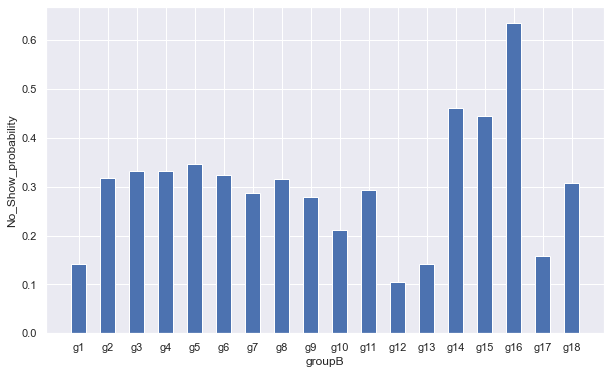

In [22]:
# 대상 데이터
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# 그래프 크기 지정  
plt.figure(figsize = (10, 6))

plt.bar(x, b.values, align='center', width = 0.5)

# 막대 그래프의 각 레이블
plt.xticks(x, [ 'g1', 'g2', 'g3','g4', 'g5', 'g6','g7', 'g8','g9', 'g10', 'g11','g12', 'g13', 'g14','g15', 'g16','g17','g18'])

# x와 y 레이블 설정
plt.xlabel('groupB')
plt.ylabel('No_Show_probability')
plt.grid(True)

Wait_day, SMS_received, Age, Hypertension, Scholarship, Diabetes, Handicap, Alcoholism 순으로 AIC값이 낮다.

In [23]:
# AIC값이 작은 수부터 모델을 만들어서 NULL모델과 비교.
opt_null= smf.glm(formula = "No_Show~ 1", data = data, family=sm.families.Binomial()).fit()
opt_null.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:               110527
Model:                            GLM   Df Residuals:                   110526
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55603.
Date:                Mon, 07 Jun 2021   Deviance:                   1.1121e+05
Time:                        01:39:19   Pearson chi2:                 1.11e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3743      0.007   -183.411      0.000      -1.389      -1.360
==============================================================================
"""

In [24]:
opt_null.aic

111207.60851698305

In [25]:
opt_mod1= smf.glm(formula = "No_Show~ Wait_day", data = data, family=sm.families.Binomial()).fit()
opt_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:               110527
Model:                            GLM   Df Residuals:                   110525
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53931.
Date:                Mon, 07 Jun 2021   Deviance:                   1.0786e+05
Time:                        01:39:20   Pearson chi2:                 1.09e+05
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6776      0.010   -175.067      0.000      -1.696      -1.659
Wait_day       0.0259      0.000     57.521      0.000       0.025       0.027
==============================================================================
"""

In [26]:
opt_mod1.aic

107865.43117588689

In [27]:
opt_mod2= smf.glm(formula = "No_Show~ Wait_day + SMS_received", data = data, family=sm.families.Binomial()).fit()
opt_mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:               110527
Model:                            GLM   Df Residuals:                   110524
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53711.
Date:                Mon, 07 Jun 2021   Deviance:                   1.0742e+05
Time:                        01:39:20   Pearson chi2:                 1.08e+05
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.7628      0.011   -166.375      0.000      -1.784      -1.742
Wait_day         0.0220      0.000     45.669      0.000       0.021       0.023
SMS_received     0.3540      0.017     21.094      0.000       0.321       0.387
================================================================================
"""

In [28]:
opt_mod2.aic

107428.7936911024

In [29]:
opt_mod3= smf.glm(formula = "No_Show~ Wait_day + SMS_received + Age", data = data, family=sm.families.Binomial()).fit()
opt_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:               110527
Model:                            GLM   Df Residuals:                   110523
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53445.
Date:                Mon, 07 Jun 2021   Deviance:                   1.0689e+05
Time:                        01:39:21   Pearson chi2:                 1.09e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.4930      0.015    -96.452      0.000      -1.523      -1.463
Wait_day         0.0227      0.000     46.840      0.000       0.022       0.024
SMS_received     0.3539      0.017     21.024      0.000       0.321       0.387
Age             -0.0077      0.000    -22.932      0.000      -0.008      -0.007
================================================================================
"""

In [30]:
opt_mod3.aic

106898.5551440847

In [31]:
opt_mod4= smf.glm(formula = "No_Show~ Wait_day + SMS_received + Age + Hypertension", 
                  data = data, family=sm.families.Binomial()).fit()
opt_mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:               110527
Model:                            GLM   Df Residuals:                   110522
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53445.
Date:                Mon, 07 Jun 2021   Deviance:                   1.0689e+05
Time:                        01:39:21   Pearson chi2:                 1.09e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.4925      0.016    -95.260      0.000      -1.523      -1.462
Wait_day         0.0227      0.000     46.789      0.000       0.022       0.024
SMS_received     0.3539      0.017     21.024      0.000       0.321       0.387
Age             -0.0078      0.000    -19.950      0.000      -0.009      -0.007
Hypertension     0.0052      0.023      0.221      0.825      -0.041       0.051
================================================================================
"""

In [32]:
opt_mod4.aic

106900.50609786324

In [33]:
opt_mod5= smf.glm(formula = "No_Show~ Wait_day + SMS_received + Age + Hypertension + Scholarship", 
                  data = data, family=sm.families.Binomial()).fit()
opt_mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:               110527
Model:                            GLM   Df Residuals:                   110521
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53400.
Date:                Mon, 07 Jun 2021   Deviance:                   1.0680e+05
Time:                        01:39:22   Pearson chi2:                 1.09e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.5285      0.016    -94.424      0.000      -1.560      -1.497
Wait_day         0.0229      0.000     47.096      0.000       0.022       0.024
SMS_received     0.3515      0.017     20.873      0.000       0.318       0.385
Age             -0.0075      0.000    -19.055      0.000      -0.008      -0.007
Hypertension    -0.0011      0.023     -0.045      0.964      -0.047       0.045
Scholarship      0.2354      0.024      9.616      0.000       0.187       0.283
================================================================================
"""

In [34]:
opt_mod5.aic

106812.81967726158

In [35]:
opt_mod6= smf.glm(formula = "No_Show~ Wait_day + SMS_received + Age + Hypertension + Scholarship + Diabetes", 
                  data = data, family=sm.families.Binomial()).fit()
opt_mod6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:               110527
Model:                            GLM   Df Residuals:                   110520
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53394.
Date:                Mon, 07 Jun 2021   Deviance:                   1.0679e+05
Time:                        01:39:22   Pearson chi2:                 1.09e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.5271      0.016    -94.312      0.000      -1.559      -1.495
Wait_day         0.0229      0.000     47.167      0.000       0.022       0.024
SMS_received     0.3518      0.017     20.888      0.000       0.319       0.385
Age             -0.0076      0.000    -19.304      0.000      -0.008      -0.007
Hypertension    -0.0316      0.025     -1.268      0.205      -0.080       0.017
Scholarship      0.2363      0.024      9.649      0.000       0.188       0.284
Diabetes         0.1236      0.035      3.572      0.000       0.056       0.191
================================================================================
"""

In [36]:
opt_mod6.aic

106802.22072334938

In [37]:
opt_mod7= smf.glm(formula = "No_Show~ Wait_day + SMS_received + Age + Hypertension + Scholarship + Diabetes + Handicap", 
                  data = data, family=sm.families.Binomial()).fit()
opt_mod7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:               110527
Model:                            GLM   Df Residuals:                   110519
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53393.
Date:                Mon, 07 Jun 2021   Deviance:                   1.0679e+05
Time:                        01:39:23   Pearson chi2:                 1.09e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.5276      0.016    -94.302      0.000      -1.559      -1.496
Wait_day         0.0229      0.000     47.174      0.000       0.022       0.024
SMS_received     0.3522      0.017     20.905      0.000       0.319       0.385
Age             -0.0076      0.000    -19.333      0.000      -0.008      -0.007
Hypertension    -0.0326      0.025     -1.307      0.191      -0.082       0.016
Scholarship      0.2364      0.024      9.651      0.000       0.188       0.284
Diabetes         0.1227      0.035      3.546      0.000       0.055       0.191
Handicap         0.0562      0.049      1.146      0.252      -0.040       0.152
================================================================================
"""

In [38]:
opt_mod7.aic

106802.9264253055

In [39]:
opt_mod8= smf.glm(formula = "No_Show~ Wait_day + SMS_received + Age + Hypertension + Scholarship + Diabetes + Handicap + Alcoholism", 
                  data = data, family=sm.families.Binomial()).fit()
opt_mod8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:               110527
Model:                            GLM   Df Residuals:                   110518
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53383.
Date:                Mon, 07 Jun 2021   Deviance:                   1.0677e+05
Time:                        01:39:23   Pearson chi2:                 1.09e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.5293      0.016    -94.325      0.000      -1.561      -1.497
Wait_day         0.0230      0.000     47.303      0.000       0.022       0.024
SMS_received     0.3532      0.017     20.961      0.000       0.320       0.386
Age             -0.0077      0.000    -19.608      0.000      -0.009      -0.007
Hypertension    -0.0388      0.025     -1.553      0.120      -0.088       0.010
Scholarship      0.2315      0.025      9.444      0.000       0.183       0.280
Diabetes         0.1272      0.035      3.675      0.000       0.059       0.195
Handicap         0.0571      0.049      1.164      0.244      -0.039       0.153
Alcoholism       0.2111      0.045      4.710      0.000       0.123       0.299
================================================================================
"""

In [40]:
opt_mod8.aic

106783.54168038823

In [41]:
''' AIC값이 가장 작은 모델(Paramete가 Wait_day, SMS_received, Age, Hypertension, Scholarship, Diabetes, Handicap, Alcoholism")에서
p값이 0.05보다 큰 parameter들 제거.'''

opt2_mod = smf.glm(formula = "No_Show~ Wait_day + SMS_received + Age + Scholarship + Diabetes + Alcoholism", 
                  data = data, family=sm.families.Binomial()).fit()
opt2_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                No_Show   No. Observations:               110527
Model:                            GLM   Df Residuals:                   110520
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53385.
Date:                Mon, 07 Jun 2021   Deviance:                   1.0677e+05
Time:                        01:39:23   Pearson chi2:                 1.09e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.5253      0.016    -95.076      0.000      -1.557      -1.494
Wait_day         0.0230      0.000     47.360      0.000       0.022       0.024
SMS_received     0.3527      0.017     20.938      0.000       0.320       0.386
Age             -0.0080      0.000    -22.361      0.000      -0.009      -0.007
Scholarship      0.2304      0.025      9.403      0.000       0.182       0.278
Diabetes         0.1097      0.032      3.386      0.001       0.046       0.173
Alcoholism       0.2071      0.045      4.628      0.000       0.119       0.295
================================================================================
"""

In [42]:
opt2_mod.aic

106783.1736832366

### +) Predict 해보기

In [43]:
a = opt2_mod.predict()
b = list(a)
data['predicted_No_Show'] = [1 if c >= 0.5 else 0 for c in b]
data

,PatientId,AppointmentID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No_Show,between,Wait_day,groupB,predicted_No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0 days,0,g11,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0 days,0,g11,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0 days,0,g11,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0 days,0,g11,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0 days,0,g11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,0,35 days,35,g14,0
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,0,35 days,35,g14,0
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,0,41 days,41,g15,0
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,0,41 days,41,g15,0


In [44]:
len(data[data.No_Show!=data.predicted_No_Show])/len(data)

0.205

예측율이 약 80%정도이다.

In [48]:
a = input('당신의 예약을 잡은 날은? ex.2021-06-04 ')
b = input('당신의 예약날은? ex.2021-10-04 ')
c = input('예약된 병원은 예약 전에 문자를 해주나요?(네/아니요) ')
d = input('당신의 나이는?(숫자만 입력할것) ')
e = input('사회의 지원을 받는 가정인가요?(네/아니요) ')
f = input('당신은 알코올 의존증이 있는가?(네/아니요) ')
g = input('당신은 당뇨병이라는 질환을 가지고 있나요?(네/아니요) ')

from datetime import datetime

d0 = datetime.strptime(a, "%Y-%m-%d")
d1 = datetime.strptime(b, "%Y-%m-%d")
delta = d1 - d0 

x = np.timedelta64(delta, 'ns')
days = x.astype('timedelta64[D]')
N_days = abs(days / np.timedelta64(1, 'D'))
N_days

if c == '네':
    c = 1
else:
    c = 0
if e == '네':
    e = 1
else:
    e = 0 
if f == '네':
    f = 1
else:
    f = 0
if g == '네':
    g = 1
else:
    g = 0
    
raw_data = {'Wait_day': N_days,'SMS_received': c,'Age': int(d),'Scholarship': e,
            'Alcoholism':f,'Diabetes':g}
data_1 = pd.DataFrame(raw_data,index = [0])

당신의 예약을 잡은 날은? ex.2021-06-04 2021-06-04
당신의 예약날은? ex.2021-10-04 2021-10-04
예약된 병원은 예약 전에 문자를 해주나요?(네/아니요) 네
당신의 나이는?(숫자만 입력할것) 21
사회의 지원을 받는 가정인가요?(네/아니요) 아니요
당신은 알코올 의존증이 있는가?(네/아니요) 아니요
당신은 당뇨병이라는 질환을 가지고 있나요?(네/아니요) 아니요


In [49]:
data_1

,Wait_day,SMS_received,Age,Scholarship,Alcoholism,Diabetes
0,122.0,1,21,0,0,0


In [50]:
opt2_mod.predict(data_1)

0    0.812803
dtype: float64